머신러닝 모델의 성능을 단순히 '맞았다/틀렸다'가 아닌, 임상적 유용성의 관점에서 평가하는 방법을 배운다.

헬스케어 분야에서 모델의 평가는 환자의 생명과 직결될 수 있는 매우 중요한 문제이다. 따라서 단순한 정확도(Accuracy)를 넘어, 오차 행렬(Confusion Matrix)을 해부하고 정밀도(Precision)와 재현율(Recall)의 의미를 깊이 있게 파고든다.

---

# 📘 [2일차 4교시] 4.1. 분류 모델 평가 지표 1: 정확도의 함정과 오차 행렬

## 1. 모델의 성적표를 의심하라: 정확도(Accuracy)의 배신

### 1) 99점짜리 AI 의사가 돌팔이일 수 있는 이유
우리는 학창 시절 시험에서 100점 만점에 90점을 받으면 우등생이라고 생각했다. 머신러닝에서도 모델의 성능을 평가할 때 가장 먼저 떠올리는 지표는 '정확도(Accuracy)'이다. 정확도란 전체 데이터 중에서 모델이 정답을 맞힌 비율을 뜻한다.
$$ \text{정확도} = \frac{\text{맞힌 개수}}{\text{전체 데이터 개수}} $$

하지만 헬스케어, 특히 희귀 질환을 다루는 영역에서 이 정확도는 치명적인 거짓말을 할 수 있다. 극단적인 예시를 들어보자.

*   상황: 전 국민의 1%만이 걸리는 희귀한 전염병을 진단하는 AI를 개발했다.
*   데이터: 100명의 사람이 병원을 찾았다. 실제로는 99명이 정상이고, 단 1명만이 감염자이다.
*   AI 모델의 행동: 이 AI는 학습을 전혀 하지 않았고, 그냥 무조건 "당신은 정상입니다"라고만 말하는 엉터리 모델이다.
*   채점 결과:
    *   정상인 99명에게 "정상"이라고 했으니 99개를 맞췄다. (정답)
    *   감염자 1명에게 "정상"이라고 했으니 1개를 틀렸다. (오답)
    *   정확도: $99 / 100 = \mathbf{99\%}$

이 모델의 정확도는 무려 99%이다. 수치만 보면 완벽에 가까운 명의처럼 보인다. 하지만 이 모델은 병원에 존재할 가치가 있는가? 전혀 없다. 병원의 존재 목적은 그 1명의 환자를 찾아내어 치료하는 것인데, 이 모델은 가장 중요한 1명을 놓쳤기 때문이다.

이처럼 정답 클래스의 비율이 극도로 차이 나는 상황을 '데이터 불균형(Data Imbalance)'이라고 한다. 헬스케어 데이터의 90% 이상은 불균형 데이터이다(암 환자보다 정상인이 훨씬 많고, 사기 청구보다 정상 청구가 훨씬 많다). 따라서 우리는 정확도라는 숫자에 현혹되지 말고, 모델이 '무엇을 맞췄고 무엇을 틀렸는지'를 뜯어봐야 한다.

---

## 2. 오차 행렬(Confusion Matrix): 맞고 틀림의 4가지 해부학

모델의 예측 결과를 단순히 O/X로 채점하는 것이 아니라, 실제 정답과 예측 결과의 조합을 2x2 표로 정리한 것을 '오차 행렬(Confusion Matrix)'이라고 한다. 헬스케어에서 이 4가지 경우는 각기 다른 임상적 의미와 무게감을 가진다.

여기서 Positive(양성, 1)는 우리가 찾으려는 대상(암, 질병), Negative(음성, 0)는 정상 상태를 의미한다고 약속한다.

### 1) TP (True Positive, 진양성): "잘 잡았다"
*   상황: 실제 암 환자(Positive)를 AI가 "암입니다(Positive)"라고 올바르게(True) 예측한 경우이다.
*   의미: 최고의 상황이다. 환자는 조기에 병을 발견하여 치료를 시작할 수 있다. 모델이 존재해야 하는 이유이다.

### 2) TN (True Negative, 진음성): "안심하세요"
*   상황: 실제 정상인(Negative)을 AI가 "정상입니다(Negative)"라고 올바르게(True) 예측한 경우이다.
*   의미: 환자는 안심하고 귀가하면 된다. 불필요한 의료 자원 낭비를 막았다.

### 3) FP (False Positive, 위양성): "양치기 소년의 거짓말"
*   상황: 실제로는 정상인(Negative)인데, AI가 "암입니다(Positive)"라고 틀리게(False) 예측한 경우이다. 가짜 양성이라고도 한다.
*   의료적 결과: 환자는 깜짝 놀라 상급 병원에 가서 정밀 검사(CT, 조직 검사)를 받게 된다. 결과적으로 돈과 시간을 쓰고 심리적 고통을 겪지만, 신체적으로는 건강하다. 이를 '오진(False Alarm)'이라고 한다.
*   통계적 용어: 제1종 오류(Type I Error).

### 4) FN (False Negative, 위음성): "놓쳐버린 범인"
*   상황: 실제로는 암 환자(Positive)인데, AI가 "정상입니다(Negative)"라고 틀리게(False) 예측한 경우이다. 가짜 음성이라고도 한다.
*   의료적 결과: 이것이 헬스케어에서 가장 두려워하는 최악의 상황이다. 환자는 자신이 건강한 줄 알고 치료 시기를 놓치게 되며, 병이 악화되어 나중에 손쓸 수 없는 상태로 발견될 수 있다. 환자의 생명과 직결되는 치명적인 실수이다.
*   통계적 용어: 제2종 오류(Type II Error).

결론: 똑같이 한 문제를 틀렸더라도, 정상인을 환자로 착각한 것(FP)과 환자를 정상인으로 착각한 것(FN)의 무게는 하늘과 땅 차이다. 머신러닝 모델을 만들 때는 이 FN을 줄이는 데 사활을 걸어야 한다.

---

## 3. 정밀도(Precision)와 재현율(Recall): 두 마리 토끼의 딜레마

오차 행렬의 4가지 숫자를 조합하면, 모델의 성격을 나타내는 두 가지 핵심 지표를 만들 수 있다. 이 둘은 서로 트레이드오프(Trade-off) 관계에 있어서, 하나를 올리면 다른 하나가 떨어지는 경향이 있다.

### 1) 정밀도 (Precision): "AI의 말을 얼마나 믿을 수 있는가?"
*   질문: AI가 "환자입니다!"라고 지목한 사람들 중에, 진짜 환자의 비율은 얼마인가?
*   수식: $$ \frac{TP}{TP + FP} = \frac{\text{진짜 환자}}{\text{AI가 환자라고 부른 사람 전체}} $$
*   목표: "무고한 희생자(FP)를 만들지 말자."
*   헬스케어 예시:
    *   고위험 뇌수술: AI가 수술이 필요하다고 해서 머리를 열었는데, 막상 보니 종양이 없다면? 이는 엄청난 의료 사고다. 이런 고위험 시술을 결정하는 AI는 정밀도가 극도로 높아야 한다. 확실하지 않으면 "수술하자"는 말을 아껴야 한다.
    *   스팸 메일 필터: 정상 메일을 스팸으로 분류(FP)해버리면 중요한 업무 메일을 놓친다. 그래서 스팸 필터는 확실한 것만 스팸통에 넣어야 한다. 즉, 정밀도가 높아야 한다.

### 2) 재현율 (Recall) / 민감도 (Sensitivity): "환자를 얼마나 잘 찾아내는가?"
*   질문: 병원에 온 실제 환자들 중에, AI가 놓치지 않고 찾아낸 비율은 얼마인가?
*   수식: $$ \frac{TP}{TP + FN} = \frac{\text{찾아낸 환자}}{\text{전체 실제 환자}} $$
*   목표: "단 한 명의 환자도 놓치지 말자(FN을 0으로 만들자)."
*   헬스케어 예시:
    *   암 선별 검사(Screening): 암 검진의 목적은 환자를 걸러내는 것이다. 의심스러운 사람은 일단 "양성"이라고 판정해서 정밀 검사를 받게 해야 한다. 설령 그중에 정상인이 섞여 있더라도(FP), 암 환자를 집으로 돌려보내는 일(FN)은 없어야 한다.
    *   전염병 방역: 공항 검색대에서 열이 나는 사람을 잡아낸다. 그냥 감기인 사람을 좀 억울하게 잡더라도, 코로나 확진자를 통과시키면 안 된다. 이때는 재현율을 극한으로 높여야 한다.

### 3) 정밀도와 재현율의 시소 타기
우리는 정밀도와 재현율 둘 다 100%인 모델을 원하지만, 현실적으로는 불가능에 가깝다.
*   AI가 신중해지면: "정말 확실할 때만 환자라고 할래." $\rightarrow$ 오진(FP)은 줄어서 정밀도는 올라가지만, 애매한 증상의 진짜 환자를 놓쳐서 재현율은 떨어진다.
*   AI가 예민해지면: "조금이라도 이상하면 다 환자라고 할래." $\rightarrow$ 환자를 다 잡아내서 재현율은 올라가지만, 멀쩡한 사람도 잡혀와서 정밀도는 떨어진다.

---

## 4. F1-Score: 균형 잡힌 시각 (조화 평균)

정밀도와 재현율 중 어느 한쪽만 보면 모델을 과대평가하거나 과소평가할 수 있다. 이 두 지표를 적절히 합쳐서 하나의 점수로 만든 것이 F1-Score이다.

### 1) 왜 산술 평균이 아니라 조화 평균인가?
단순히 $(\text{정밀도} + \text{재현율}) / 2$를 하지 않고, 역수를 이용한 조화 평균(Harmonic Mean)을 사용한다.
$$ \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

*   이유: 조화 평균은 두 값 중 하나라도 0에 가까우면 전체 점수가 확 깎이는 특성이 있다.
    *   상황 A: 정밀도 1.0, 재현율 0.0 (환자를 한 명도 못 찾음)
    *   산술 평균: (1 + 0) / 2 = 0.5 (50점이나 준다. 부당하다.)
    *   조화 평균(F1): 0점이 나온다.
    *   상황 B: 정밀도 0.5, 재현율 0.5
    *   산술 평균: 0.5
    *   조화 평균(F1): 0.5

즉, F1-Score는 "정밀도와 재현율이 골고루 좋을 때만 높은 점수를 주는" 깐깐한 지표이다. 데이터 불균형이 심한 헬스케어 분야에서 모델의 성능을 비교할 때, 정확도(Accuracy) 대신 이 F1-Score를 메인 지표로 삼는 경우가 많다.

---

## 5. 요약: 

1.  정확도의 함정: 환자가 적은 불균형 데이터에서는 "모두 정상"이라고 찍어도 정확도가 높게 나온다. 절대 정확도만 믿지 마라.
2.  오차 행렬: 모델의 예측 결과를 TP, TN, FP, FN 네 가지로 쪼개서 봐야 한다.
    *   FP (위양성): 정상인을 환자로 오진 (불편함 초래).
    *   FN (위음성): 환자를 정상으로 오진 (생명 위협). 의료에서는 FN이 훨씬 더 나쁘다.
3.  정밀도(Precision): 모델이 "환자다"라고 했을 때의 신뢰도. 양치기 소년이 되지 않으려면 높아야 한다.
4.  재현율(Recall): 실제 환자를 얼마나 놓치지 않고 잡았는지. 암 진단이나 전염병 관리에서 가장 중요한 지표다.
5.  F1-Score: 정밀도와 재현율의 조화 평균. 두 지표의 균형을 평가하는 척도다.

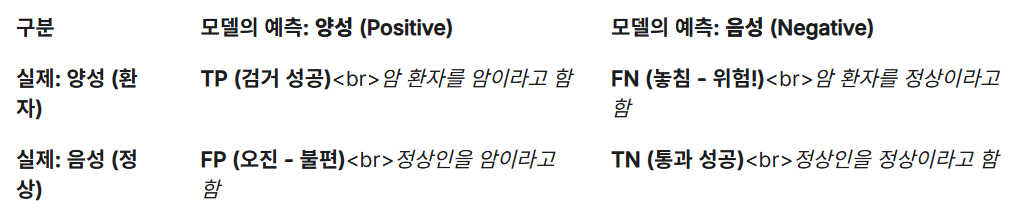



## 4.2. \[예제 1\] 정확도의 함정 (Imbalanced Data)

데이터가 불균형할 때, 무조건 ’0’으로만 찍는 바보 모델이 얼마나 높은
정확도를 기록하는지 직접 확인한다.

상황: 희귀 질환(발병률 5%) 데이터셋에서의 모델 평가.

``` python
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 데이터 생성 (100명 중 5명만 환자)
y_true = np.array([0]*95 + [1]*5)

# 2. 바보 모델 (Dummy Classifier)
# 무조건 '정상(0)'이라고만 예측함
y_pred_dummy = np.array([0]*100)

# 3. 정확도 계산
acc = accuracy_score(y_true, y_pred_dummy)

print(f"전체 데이터 수: {len(y_true)}명")
print(f"실제 환자 수: {sum(y_true)}명")
print(f"바보 모델의 정확도(Accuracy): {acc * 100}%")

# 설명:
# 정확도는 95%나 나오지만, 실제 환자 5명은 모두 놓쳤다. 
# 이 모델은 쓰레기통에 들어가야 하지만, 숫자(95점)만 보면 우등생처럼 보인다.
```


> 📖 문제 풀이 가이드
>
> 헬스케어의 현실, 불균형 데이터(Imbalanced Data)의 함정을 목격합니다.
> - 상황: 환자 5명, 정상인 95명.
> - 바보 모델: 그냥 무조건 "정상"이라고 찍습니다.
> - 결과: 정확도(Accuracy)는 95%가 나옵니다.
> - 함정: 수치상으로는 우등생 같지만, 실제로는 암 환자를 한 명도 못 찾는 살인 기계나 다름없습니다.



In [1]:
# do write code
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = np.array([0]*95+[1]*5)

y_pred_dummy = np.array([0]*100)

acc = accuracy_score(y_true, y_pred_dummy)

print(f"전체 데이터 수: {len(y_true)}명")
print(f"실제 환자 수: {sum(y_true)}명")
print(f"바보 모델의 정확도(Accuracy): {acc*100}%")

전체 데이터 수: 100명
실제 환자 수: 5명
바보 모델의 정확도(Accuracy): 95.0%


## 4.3. \[예제 2\] 오차 행렬(Confusion Matrix) 시각화

맞고 틀린 개수를 2x2 행렬로 시각화하여 TP, TN, FP, FN의 개수를 직접
센다.

상황: 암 진단 모델의 예측 결과 분석.

``` python
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 가상의 예측 결과 (조금 더 똑똑한 모델)
# 실제: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] (5명 정상, 5명 환자)
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# 예측: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1] (정상 1명 오진(FP), 환자 1명 놓침(FN))
y_pred = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# 2. 오차 행렬 생성
cm = confusion_matrix(y_true, y_pred)
# cm 구조: [[TN, FP], 
#           [FN, TP]]

# 3. 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Normal (0)', 'Cancer (1)'])
plt.yticks([0.5, 1.5], ['Normal (0)', 'Cancer (1)'])
plt.title('Confusion Matrix')
plt.show()

# 4. 수동 계산 확인
tn, fp, fn, tp = cm.ravel()
print(f"TN(잘 맞춘 정상): {tn}명")
print(f"FP(가짜 암 환자 - 위양성): {fp}명")
print(f"FN(놓친 암 환자 - 위음성): {fn}명")
print(f"TP(잘 맞춘 암 환자): {tp}명")
```


> 📖 문제 풀이 가이드
>
> 정확도 하나로 퉁치지 말고, 오차 행렬(Confusion Matrix)을 열어서 4가지를 꼼꼼히 따져봅니다.
> - TP (True Positive): 암 환자를 암이라고 잘 잡은 것 (성공)
> - TN (True Negative): 정상인을 정상이라고 잘 보낸 것 (성공)
> - FP (False Positive): 정상인을 암이라고 오진 (과잉 진료, 해프닝)
> - FN (False Negative): 암 환자를 정상이라고 오진 (의료 사고, 사망 위험) -> 가장 중요!



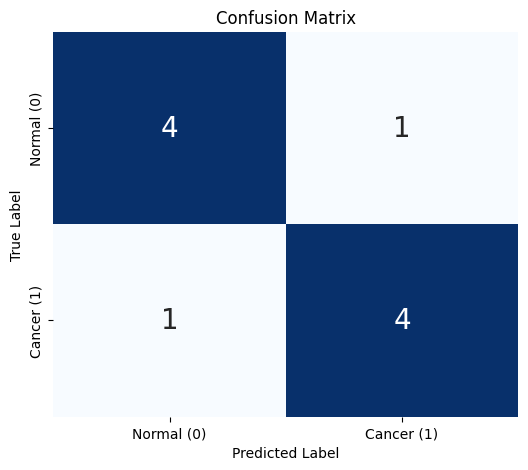

TN(잘 맞춘 정상): 4명
FP(가짜 암 환자 - 위양성): 1명
FN(놓친 암 환자 - 위음성): 1명
TP(잘 맞춘 암 환자): 4명


In [2]:
# do write code
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0,0,0,0,0,1,1,1,1,1]

y_pred = [0,0,1,0,0,1,1,0,1,1]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size":20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5,1.5], ['Normal (0)', 'Cancer (1)'])
plt.yticks([0.5,1.5], ['Normal (0)', 'Cancer (1)'])
plt.title('Confusion Matrix')
plt.show()


tn, fp, fn, tp = cm.ravel()
print(f"TN(잘 맞춘 정상): {tn}명")
print(f"FP(가짜 암 환자 - 위양성): {fp}명")
print(f"FN(놓친 암 환자 - 위음성): {fn}명")
print(f"TP(잘 맞춘 암 환자): {tp}명")

## 4.4. \[예제 3\] 정밀도(Precision)와 재현율(Recall) 계산

라이브러리 함수와 수기 계산이 일치하는지 확인하며 공식을 체화한다.

``` python
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Scikit-learn 함수 사용
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("=== Scikit-learn 계산 ===")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall):    {recall:.4f}")
print(f"F1-Score:           {f1:.4f}")

# 2. 수기 계산 (공식 검증)
# Precision = TP / (TP + FP)
calc_prec = tp / (tp + fp)
# Recall = TP / (TP + FN)
calc_rec = tp / (tp + fn)

print("\n=== 수기 계산 ===")
print(f"정밀도: {tp}/({tp}+{fp}) = {calc_prec:.4f}")
print(f"재현율: {tp}/({tp}+{fn}) = {calc_rec:.4f}")

# 설명:
# 정밀도 0.8: 모델이 암이라고 한 5명 중 4명만 진짜 암이었다. (1명 억울함)
# 재현율 0.8: 실제 암 환자 5명 중 4명만 찾아냈다. (1명 놓침 -> 위험!)
```


> 📖 문제 풀이 가이드
>
> 두 마리 토끼, 정밀도(Precision)와 재현율(Recall)을 직접 계산해봅니다.
> - 정밀도: "내가 암이라고 했을 때, 진짜 암인 확률" (신중함)
> - 재현율: "진짜 암 환자 중에서, 내가 찾아낸 비율" (검거율)
> - 헬스케어: 정밀도가 좀 떨어져도(오진이 있더라도), 재현율(놓치는 환자 없음)을 높이는 게 우선입니다.



In [5]:
# do write code
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("=== Scikit-learn 계산 ===")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall):    {recall:.4f}")
print(f"F1-Score:         {f1:.4f}")

calc_prec = tp / (tp+fp)
calc_rec = tp / (tp+fn)

print("\n=== 수기 계산 ===")
print(f"정밀도: {tp}/({tp}+{fp}) = {calc_prec:.4f}")
print(f"재현율: {tp}/({tp}+{fn}) = {calc_rec:.4f}")



=== Scikit-learn 계산 ===
정밀도 (Precision): 0.8000
재현율 (Recall):    0.8000
F1-Score:         0.8000

=== 수기 계산 ===
정밀도: 4/(4+1) = 0.8000
재현율: 4/(4+1) = 0.8000


## 4.5. \[예제 4\] 임계값(Threshold) 조정에 따른 트레이드오프

임계값을 낮추면 재현율이 어떻게 변하는지 확인한다. 헬스케어 모델 튜닝의
핵심 과정이다.

상황: “암 진단 기준을 0.5에서 0.3으로 낮추면(더 민감하게 반응하면)
어떤 일이 벌어지는가?”

``` python
# 1. 모델이 예측한 확률 (Probability) 가정
# 0.35, 0.4 같은 애매한 환자들이 있음
y_prob = np.array([0.1, 0.2, 0.35, 0.4, 0.8, 0.9, 0.45, 0.6, 0.95, 0.1])
# 실제 정답
y_true = np.array([0,   0,   0,   1,   1,   1,   1,   0,   1,    0])

# 2. 임계값 0.5일 때 (기본)
y_pred_50 = (y_prob >= 0.5).astype(int)
rec_50 = recall_score(y_true, y_pred_50)
prec_50 = precision_score(y_true, y_pred_50)

# 3. 임계값 0.3일 때 (민감도 증가)
y_pred_30 = (y_prob >= 0.3).astype(int)
rec_30 = recall_score(y_true, y_pred_30)
prec_30 = precision_score(y_true, y_pred_30)

print(f"임계값 0.5 -> 재현율: {rec_50:.2f}, 정밀도: {prec_50:.2f}")
print(f"임계값 0.3 -> 재현율: {rec_30:.2f}, 정밀도: {prec_30:.2f}")

# 설명:
# 임계값을 0.3으로 낮추자 재현율이 1.0(100%)이 되었다. 숨어있던 환자(0.35, 0.4, 0.45)를 다 잡았다.
# 대신 정밀도는 떨어졌다. 정상인도 환자로 의심했기 때문이다.
# 하지만 암 진단에서는 재현율 1.0을 만드는 이 설정이 더 우수할 수 있다.
```


> 📖 문제 풀이 가이드
>
> 헬스케어 AI 튜닝의 핵심, 임계값(Threshold) 조정입니다.
> - 기본값: 확률 0.5 이상이면 "환자(1)"로 판정.
> - 조정: 확률 0.3(30%)만 넘어도 그냥 "환자(1)"로 보자! (엄격하게 관리)
> - 효과: 약간이라도 의심되는 사람을 다 잡아들입니다. 재현율이 100%로 상승하지만, 정상인을 환자로 오해하는 경우(FP)도 늘어납니다. (Trade-off)



In [6]:
# do write code
y_prob = np.array([0.1,0.2,0.35,0.4,0.8,0.9,0.45,0.6,0.95,0.1])

y_true = np.array([0,0,0,1,1,1,1,0,1,0])

y_pred_50 = (y_prob >= 0.5).astype(int)
rec_50 = recall_score(y_true, y_pred_50)
prec_50 = precision_score(y_true, y_pred_50)

y_pred_30 = (y_prob >=0.3).astype(int)
rec_30 = recall_score(y_true, y_pred_30)
prec_30 = precision_score(y_true, y_pred_30)

print(f"임계값 0.5 -> 재현율: {rec_50:.2f}, 정밀도: {prec_50:.2f}")
print(f"임계값 0.5 -> 재현율: {rec_30:.2f}, 정밀도: {prec_30:.2f}")

임계값 0.5 -> 재현율: 0.60, 정밀도: 0.75
임계값 0.5 -> 재현율: 1.00, 정밀도: 0.71


## 4.6. \[예제 5\] 분류 리포트 (Classification Report) 활용

현업에서 가장 많이 쓰는, 모든 지표를 한 번에 뽑아주는 함수를 익힌다.

``` python
from sklearn.metrics import classification_report

# 1. 예측 결과 (예제 2의 데이터 사용)
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# 2. 리포트 출력
# target_names로 보기 좋게 이름 붙이기
report = classification_report(y_true, y_pred, target_names=['Normal', 'Cancer'])

print("=== 종합 성적표 ===")
print(report)

# 설명:
# support: 각 클래스에 해당하는 실제 데이터 개수
# macro avg: 단순 평균
# weighted avg: 데이터 개수를 반영한 가중 평균
# 이 표 하나면 모델의 장단점(정상인을 잘 맞추는지, 환자를 잘 맞추는지)을 한눈에 알 수 있다.
```


> 📖 문제 풀이 가이드
>
> 현업의 필수템, `classification_report`입니다.
> - 기능: 정밀도, 재현율, F1-Score, 샘플 개수(Support)를 반별 성적표처럼 한 번에 뽑아줍니다.
> - 해석:
>   - '0'(정상) 클래스와 '1'(환자) 클래스의 점수가 다를 수 있습니다.
>   - 데이터가 적은 쪽(환자, Imbalanced)의 점수가 모델의 ‘진짜 실력’입니다.



In [7]:
# do write code
from sklearn.metrics import classification_report

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,0,1,0,0,1,1,0,1,1]

report = classification_report(y_true, y_pred, target_names=['Normal', 'Cancer'])

print("=== 종합 성적표 ===")
print(report)

=== 종합 성적표 ===
              precision    recall  f1-score   support

      Normal       0.80      0.80      0.80         5
      Cancer       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

